In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Δt=0.01
qc=0.01
g=9.81
L=1
x0=[1.8,0]
R=0.1
Q=qc*np.array([[(Δt**3)/3,(Δt**2)/2],[(Δt**2)/2,Δt]])
t=np.linspace(0.1,5,500)

In [3]:
M=lambda x,Δt,g,L:np.array([[x[0]+Δt*x[1]],[(1-Δt)*x[1]-Δt*g*np.sin(x[0])/L]])

## (1)

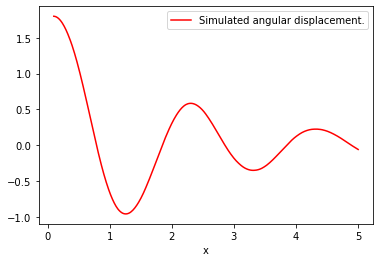

In [4]:
def Simulation(x0,Δt,g,L,Q,R):
    x=np.zeros((501,2))
    y=np.zeros((500,1))
    x[0]=x0
    for i in range(1,501):
        δi=np.linalg.cholesky(Q)@np.random.normal(0,1,2)
        x[i]=(M(x[i-1],Δt,g,L)+δi.reshape(2,1)).T
        y[i-1]=np.sin(x[i-1,0])+np.sqrt(R)*np.random.normal()
    return x,y
x,y=Simulation(x0,Δt,g,L,Q,R)
plt.plot(t,x[:,0][1:],color = 'r')
plt.legend(["Simulated angular displacement."])
plt.xlabel('x')           
plt.show()

## (2)

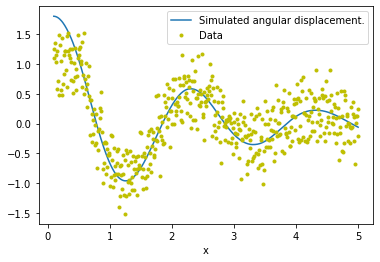

In [5]:
plt.plot(t,x[:,0][1:])
plt.plot(t,y,'.',color = 'y')
plt.legend(["Simulated angular displacement.",'Data'])
plt.xlabel('x')
plt.show()

## (3)

<ipython-input-6-e2bf9d15f79a>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Hˣ=lambda x:np.array([[np.cos(x[0]),0]])


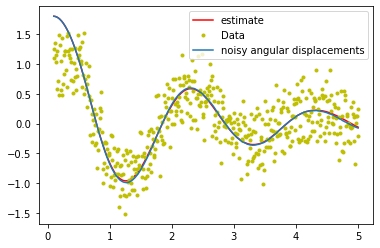

In [6]:
Mˣ=lambda x,Δt,g,L:np.array([[1,Δt],[-Δt*g*np.cos(x[0])/L, 1-Δt]])
H=lambda x:np.sin(x[0])
Hˣ=lambda x:np.array([[np.cos(x[0]),0]])
Po=0.1*Q
def ExtendedKalman(x0,Po,Δt,g,L,Q,y,R):
    xᵃ=np.zeros((501,2))
    xᵃ[0]=x0
    Pa=np.zeros((501,2,2))
    Pa[0]=Po
    for i in range(1,501):
        xᶠ=M(xᵃ[i-1],Δt,g,L)
        Pᶠ=Mˣ(xᵃ[i-1],Δt, g,L)@Pa[i-1]@Mˣ(xᵃ[i-1],Δt,g,L).T+Q
        K=Pf@ Hx(xf).T*(R+Hˣ(xᶠ)@Pf@Hˣ(xᶠ).T)**(-1)
        xᵃ[i]=(xᶠ + K*(y[i-1]-H(xᶠ).T)).T
        Pa[i]=(np.eye(2) - K@Hˣ(xᶠ)) @ Pᶠ
    return xa[:,0][1:],Pa

xᵃ,Pa=ExtendedKalman(x0,Po,Δt,g,L,Q,y,R)
plt.plot(t,x[:,0][1:],color = 'r')
plt.plot(t,y,'.',color='y')
plt.plot(t,xᵃ)
plt.legend(["estimate","Data","noisy angular displacements"])
plt.show()